<a href="https://colab.research.google.com/github/ML-Challenge/week4-unsupervised-learning/blob/master/L4.Discovering%20interpretable%20features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" /></a>

In this lesson, we'll learn about a dimension reduction technique called "Non-negative matrix factorization" ("NMF") that expresses samples as combinations of interpretable parts. For example, it expresses documents as combinations of topics, and images in terms of commonly occurring visual patterns. We'll also learn to use NMF to build recommender systems that can find us similar articles to read, or musical artists that match our listening history!

# Setup

In [1]:
# Download lesson datasets
# Required if you're using Google Colab
#!wget "https://github.com/ML-Challenge/week4-unsupervised-learning/raw/master/datasets.zip"
#!unzip -o datasets.zip

In [2]:
# Import utils
# We'll be using this module throughout the lesson
import utils

In [3]:
# Import dependencies
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
# and setting the size of all plots.
plt.rcParams['figure.figsize'] = [11, 7]

# Non-negative matrix factorization (NMF)

## NMF applied to Wikipedia articles

Let's apply NMF, using the tf-idf word-frequency array of Wikipedia articles, given as a csr matrix `articles`. Here, we fit the model and transform the articles. In the next example, we'll explore the result.

In [4]:
# Import NMF
from sklearn.decomposition import NMF

In [5]:
# Create an NMF instance: model
model = NMF(n_components=6)

In [6]:
# Fit the model to articles
model.fit(utils.articles)

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=6, random_state=None, shuffle=False, solver='cd', tol=0.0001,
    verbose=0)

In [7]:
# Transform the articles: nmf_features
nmf_features = model.transform(utils.articles)

In [8]:
# Print the NMF features
print(nmf_features)

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 4.40473924e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 5.66615831e-01]
 [3.82012139e-03 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 3.98654504e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 3.81747332e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 4.85526224e-01]
 [1.29276412e-02 1.37892366e-02 7.76336168e-03 3.34443768e-02
  0.00000000e+00 3.34528681e-01]
 [0.00000000e+00 0.00000000e+00 2.06745758e-02 0.00000000e+00
  6.04422970e-03 3.59068094e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 4.90985934e-01]
 [1.54256838e-02 1.42819900e-02 3.76639479e-03 2.37082029e-02
  2.62592199e-02 4.80784014e-01]
 [1.11726225e-02 3.13683751e-02 3.09491046e-02 6.56917026e-02
  1.96656269e-02 3.38295615e-01]
 [0.00000000e+00 0.00000000e+00 5.30728901e-01 0.0

## NMF features of the Wikipedia articles

Now we will explore the NMF features we created in the previous example.

In [9]:
# Create a pandas DataFrame: df
df = pd.DataFrame(nmf_features, index=utils.titles)

In [10]:
# Print the row for 'Anne Hathaway'
print(df.loc['Anne Hathaway'])

0    0.003845
1    0.000000
2    0.000000
3    0.575639
4    0.000000
5    0.000000
Name: Anne Hathaway, dtype: float64


In [11]:
# Print the row for 'Denzel Washington'
print(df.loc['Denzel Washington'])

0    0.000000
1    0.005601
2    0.000000
3    0.422328
4    0.000000
5    0.000000
Name: Denzel Washington, dtype: float64


When investigating the features, notice that for both actors, the NMF feature 3 has by far the highest value. This means that both articles are reconstructed using mainly the 3rd NMF component. In the next chapter, we'll see why: NMF components represent topics (for instance, acting!).

# NMF learns interpretable parts

## NMF learns topics of documents

We learned that when NMF is applied to documents, the components correspond to topics of documents, and the NMF features reconstruct the documents from the topics. Let's verify this for the NMF model that we built earlier using the Wikipedia articles. Previously, we saw that the 3rd NMF feature value was high for the articles about actors Anne Hathaway and Denzel Washington. In this example, let's identify the topic of the corresponding NMF component.

In [12]:
# Create a DataFrame: components_df
components_df = pd.DataFrame(model.components_, columns=utils.words)

In [13]:
# Print the shape of the DataFrame
print(components_df.shape)

(6, 13125)


In [14]:
# Select row 3: component
component = components_df.iloc[3]

In [15]:
# Print result of nlargest
print(component.nlargest())

film       0.627954
award      0.253163
starred    0.245314
role       0.211477
actress    0.186421
Name: 3, dtype: float64


Take a moment to recognise the topic that the articles about Anne Hathaway and Denzel Washington have in common

## Explore the LED digits dataset

In the following examples, we'll use NMF to decompose grayscale images into their commonly occurring patterns. Firstly, we'll explore the image dataset and see how it is encoded as an array. We are given 100 images as a 2D array 'leds', where each row represents a single 13x8 image. The images in your dataset are pictures of a LED digital display.

In [16]:
# Select the 0th row: digit
digit = utils.leds[0,:]

In [17]:
# Print digit
print(digit)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]


In [18]:
# Reshape digit to a 13x8 array: bitmap
bitmap = digit.reshape(13,8)

In [19]:
# Print bitmap
print(bitmap)

[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]


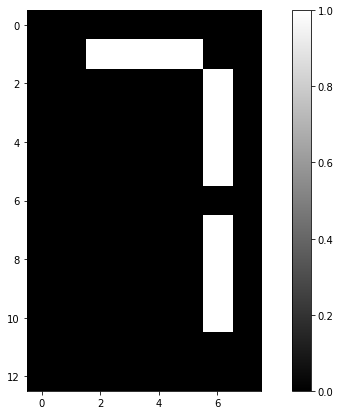

In [20]:
# Use plt.imshow to display bitmap
plt.imshow(bitmap, cmap='gray', interpolation='nearest')
plt.colorbar()
plt.show()

## NMF learns the parts of images

Now let's use what we've learned about NMF to decompose the digits dataset.

In [21]:
def show_as_image(digit):
    bitmap = digit.reshape((13, 8))
    plt.figure()
    plt.imshow(bitmap, cmap='gray', interpolation='nearest')
    plt.colorbar()
    plt.show()

In [22]:
# Create an NMF model: model
model = NMF(n_components=7)

In [23]:
# Apply fit_transform to samples: features
features = model.fit_transform(utils.leds)

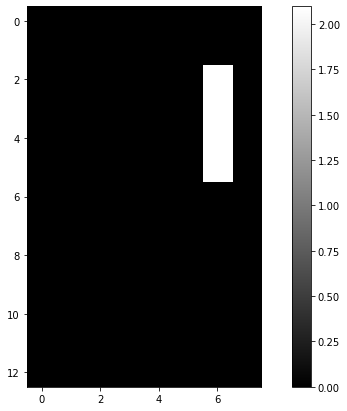

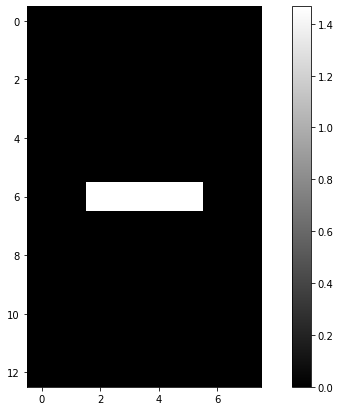

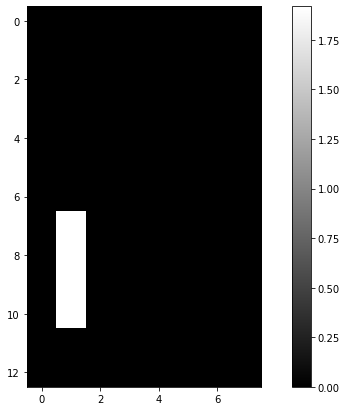

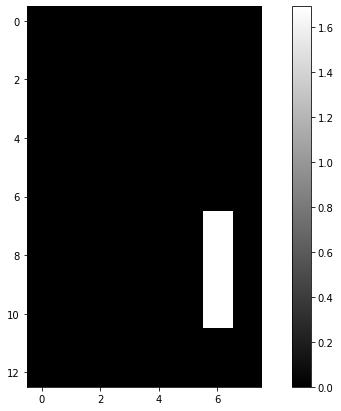

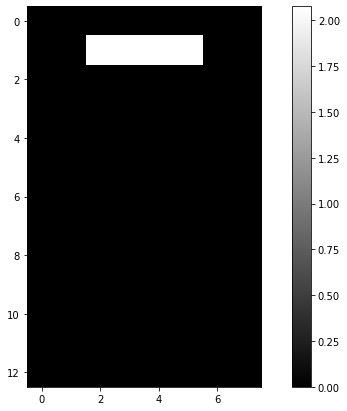

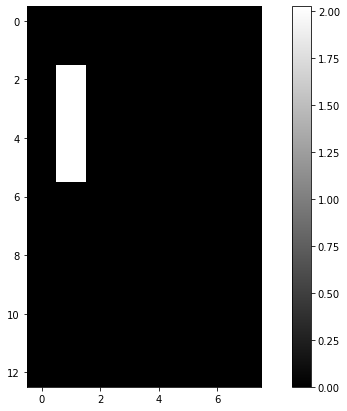

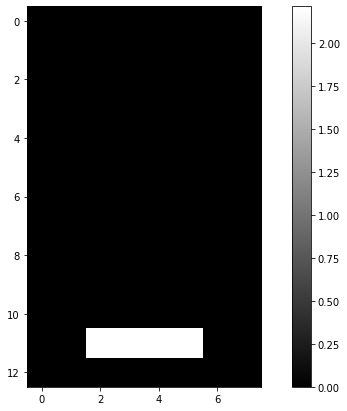

In [24]:
# Call show_as_image on each component
for component in model.components_:
    show_as_image(component)

In [25]:
# Assign the 0th row of features: digit_features
digit_features = features[0,:]

In [26]:
# Print digit_features
print(digit_features)

[4.76823559e-01 0.00000000e+00 0.00000000e+00 5.90605054e-01
 4.81559442e-01 0.00000000e+00 7.37557191e-16]


Take a moment to look through the plots and notice how NMF has expressed the digit as a sum of the components!

## PCA doesn't learn parts

Unlike NMF, PCA doesn't learn the parts of things. Its components do not correspond to topics (in the case of documents) or to parts of images, when trained on images. Let's verify this by inspecting the components of a PCA model fit to the dataset of LED digit images from the previous example. The images are available as a 2D array `leds`. Also available is a modified version of the show_as_image() function which colors a pixel red if the value is negative.

In [27]:
def show_as_image(vector):
    """
    Given a 1d vector representing an image, display that image in 
    black and white.  If there are negative values, then use red for 
    that pixel.
    """
    bitmap = vector.reshape((13, 8))  # make a square array
    bitmap /= np.abs(vector).max()  # normalise
    bitmap = bitmap[:,:,np.newaxis]
    rgb_layers = [np.abs(bitmap)] + [bitmap.clip(0)] * 2
    rgb_bitmap = np.concatenate(rgb_layers, axis=-1)
    plt.imshow(rgb_bitmap, interpolation='nearest')
    plt.xticks([])
    plt.yticks([])
    plt.show()

In [28]:
# Import PCA
from sklearn.decomposition import PCA

In [29]:
# Create a PCA instance: model
model = PCA(n_components=7)

In [30]:
# Apply fit_transform to samples: features
features = model.fit_transform(utils.leds)

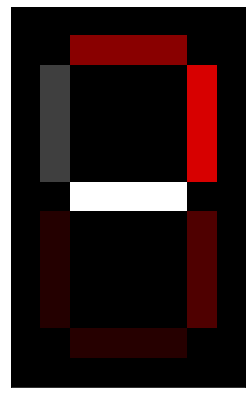

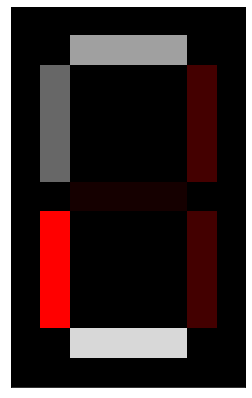

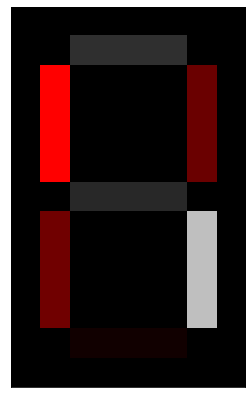

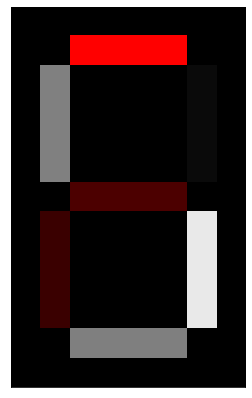

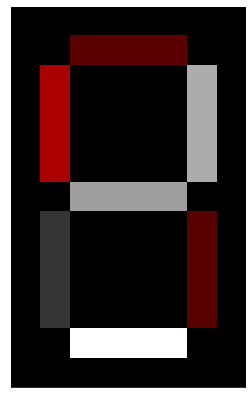

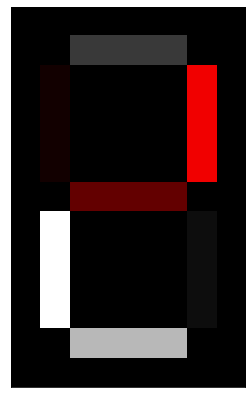

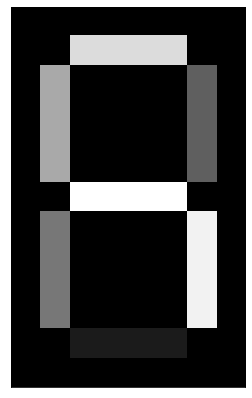

In [31]:
# Call show_as_image on each component
for component in model.components_:
    show_as_image(component)

Notice that the components of PCA do not represent meaningful parts of images of LED digits!

# Building recommender systems using NMF

## Which articles are similar to 'Cristiano Ronaldo'?

We learned how to use NMF features and the cosine similarity to find similar articles. Let's apply this to our NMF model for popular Wikipedia articles, by finding the articles most similar to the article about the footballer Cristiano Ronaldo.

In [32]:
# Perform the necessary imports
from sklearn.preprocessing import normalize

In [33]:
# Normalize the NMF features: norm_features
norm_features = normalize(nmf_features)

In [34]:
# Create a DataFrame: df
df = pd.DataFrame(norm_features, index=utils.titles)

In [35]:
# Select the row corresponding to 'Cristiano Ronaldo': article
article = df.loc['Cristiano Ronaldo']

In [36]:
# Compute the dot products: similarities
similarities = df.dot(article)

In [37]:
# Display those with the largest cosine similarity
print(similarities.nlargest())

Cristiano Ronaldo                1.000000
Franck Ribéry                    0.999972
Radamel Falcao                   0.999942
Zlatan Ibrahimović               0.999942
France national football team    0.999923
dtype: float64


## Recommend musical artists part I

In this example and the next, we'll use what we've learned about NMF to recommend popular music artists! We are given a sparse array artists whose rows correspond to `artists` and whose column correspond to users. The entries give the number of times each artist was listened to by each user.

In this example, we'll build a pipeline and transform the array into normalized NMF features. The first step in the pipeline, `MaxAbsScaler`, transforms the data so that all users have the same influence on the model, regardless of how many different artists they've listened to. In the next example, we'll use the resulting normalized NMF features for recommendation!

In [38]:
# Perform the necessary imports
from sklearn.decomposition import NMF
from sklearn.preprocessing import Normalizer, MaxAbsScaler
from sklearn.pipeline import make_pipeline

In [39]:
# Create a MaxAbsScaler: scaler
scaler = MaxAbsScaler()

In [40]:
# Create an NMF model: nmf
nmf = NMF(n_components=20)

In [41]:
# Create a Normalizer: normalizer
normalizer = Normalizer()

In [42]:
# Create a pipeline: pipeline
pipeline = make_pipeline(scaler, nmf, normalizer)

In [43]:
# Apply fit_transform to artists: norm_features
norm_features = pipeline.fit_transform(utils.artists)

Now that we've computed the normalized NMF features, we'll use them in the next example to recommend musical artists!

## Recommend musical artists part II

Suppose we are big fans of Dr. Dre - which other musicial artists might we like? Let's use the NMF features from the previous example and the cosine similarity to find similar musical artists. The names of the musical artists are available as the list `artist_names`.

In [60]:
# Create a DataFrame: df
df = pd.DataFrame(norm_features, index=utils.artist_names)

In [61]:
# Select row of 'Dr. Dre': artist
artist = df.loc['Dr. Dre']

In [62]:
# Compute cosine similarities: similarities
similarities = df.dot(artist)

In [63]:
# Display those with highest cosine similarity
print(similarities.nlargest())

Dr. Dre     1.000000
50 Cent     0.927693
Ludacris    0.901790
Eminem      0.887632
2Pac        0.874891
dtype: float64


# Final thoughts